## Code Creates DM-R in Kahn, Williams & McQuinn (2022)

In [1]:
###################################################################################################
#
# DM_vs_R_plot.py 	                (c) Ian Williams, Adnan Khan, Matt McQuinn
#     				    	        ianw89@live.com
#
###################################################################################################
from cgmbrush.cgmbrush import *

#from cgmbrush import *
import numpy as np
import plotting_routines as makefig

M_chosen = [4,9,14]  #mass bins to consider;  Matt: would be great to make this masses rather than bin numbers
provider = BolshoiProvider()

# Specify resolution
resolution = 8  #how many times to oversample the original halo field grid
grid_size = resolution*1024 

load_data = True
load_DM_vs_rad = True
load_masks = True

series = []
date = '2021-3-18'
fire_date = '2021-3-18'
NFW = NFWProfile() #NFW profile class used for subtraction

config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=1)
config.datestamp = date
vir_rad_ar = config.get_virial_radii()
avg_mass_ar = config.get_halo_masses()

print ("Masses chosen for plotting: ")
print ("{:e}".format(avg_mass_ar[M_chosen[0]]))
print ("{:e}".format(avg_mass_ar[M_chosen[1]]))
print ("{:e}".format(avg_mass_ar[M_chosen[2]]))


# config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=resolution)
# config.datestamp = date
# config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
# config.generate_profile_of_masks(load_from_files=load_masks)
# STH_DMvsR = config.DM_vs_R1
# STH_masks = config.mask_profiles
# config.clear_results()
# series.append((config.DM_vs_R1,config.mask_profiles,'3D Tophat','red'))

# config = Configuration(SphericalTophatProfile(), 2, provider=provider, resolution=resolution)
# config.datestamp = date
# config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
# config.generate_profile_of_masks(load_from_files=load_masks)
# STH_2_DMvsR = config.DM_vs_R1
# STH_2_masks = config.mask_profiles
# config.clear_results()
# series.append((config.DM_vs_R1, config.mask_profiles, '3D Tophat 2$R_{vir}$', 'orange'))

print("load flags = ", load_DM_vs_rad, load_masks, load_data)
config = Configuration(FireProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = fire_date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
fire_DMvsR = config.DM_vs_R1
fire_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'FIRE', 'green'))

print("load flags = ", load_DM_vs_rad, load_masks, load_data)
config = Configuration(NFWProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
NFW_DMvsR = config.DM_vs_R1
NFW_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'NFW', 'blue'))

#config = Configuration(PrecipitationProfile(), 1, provider=provider, resolution=resolution)
#config.datestamp = date
#config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
#config.generate_profile_of_masks(load_from_files=load_masks)
#P_DMvsR = config.DM_vs_R1
#P_masks = config.mask_profiles
#config.clear_results()
#series.append((config.DM_vs_R1, config.mask_profiles, 'Precipitation', 'c'))

Initialized NFW Profile
Initialized NFW Profile
load_from_files =  True
Loading data from  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/STH1_256_2021-3-18.npz done
Masses chosen for plotting: 
1.191254e+11
1.266272e+12
1.343652e+13
load flags =  True True True
Initialized Fire Profile
Initialized NFW Profile
trying to load  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/fire8_256_2021-3-18_DMvsR_prof.npy
trying to load  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/fire8_256_2021-3-18_masks.npy
load flags =  True True True
Initialized NFW Profile
Initialized NFW Profile
trying to load  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/NFW8_256_2021-3-18_DMvsR_prof.npy
trying to load  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/NFW8_256_2021-3-18_masks.npy


In [9]:
#The plotting routines were here not in plotting routines.py

## Let's first plot the analtyic profiles in a few models

In [ ]:
redshift = 0
df = provider.get_halos(redshift)
df, bin_markers = create_halo_array_for_convolution(df, 10**10, 9*10**15, 30)

massfactor =   1/cosmo.fb*mu*mprot/msun*(Mpc)**3

fp = FireProfile()
percip = PrecipitationProfile()
for j in range(0,len(bin_markers) -1):
    Mvir_avg = np.mean((df['Mvir'][bin_markers[j]:bin_markers[j+1]])) / cosmo.h
    #vir_rad = halo.comoving_rvir(cosmo, Mvir_avg, redshift) # comoving radius

    rvalsFire, densityFire = fp.get_analytic_profile(Mvir_avg, redshift)
    rvalsPercip, densityPercip = percip.get_analytic_profile(Mvir_avg, redshift)


    totalmassanalyticFire = 4.*np.pi*np.sum(rvalsFire[1:]**2*densityFire[1:] *(rvalsFire[1:] - rvalsFire[:-1]))
    totalmassanalyticPercip = 4.*np.pi*np.sum(rvalsPercip[1:]**2*densityPercip[1:]*(rvalsPercip[1:] - rvalsPercip[:-1]))
    
    totalmassanalyticFire *= massfactor
    totalmassanalyticPercip *= massfactor
    print("massFire in 1e12 = ", totalmassanalyticFire/1e12, " truth = ", Mvir_avg/1e12, " ratio =", totalmassanalyticFire/Mvir_avg)
    print("massPercip in 1e12 = ", totalmassanalyticPercip/1e12,  " truth = ",  Mvir_avg/1e12,  " ratio =", totalmassanalyticPercip/Mvir_avg)
    
    if j in M_chosen:
        print(rvalsPercip[1:], densityPercip[1:])
        plt.loglog(rvalsFire, densityFire)
        plt.loglog(rvalsPercip, densityPercip, '--')
        

#plt.ylim([1,200])

## Verify mass conservation

In [6]:
# Radial extent of the plots in Mpc
# dimension of the small grid around the halo we want to crop
trim_dim=int((10*resolution))
dx = (provider.Lbox/grid_size)   
MpctoKpc =1000
ival=1
massbin = M_chosen[ival]
halomass = avg_mass_ar[massbin]
#xmin = 0.5*extent/series[0][0].shape[1] #half a cell
#x_axis = np.sqrt(2)*MpctoKpc*np.linspace(xmin, extent-xmin, series[0][0].shape[1])
x_axis = MpctoKpc*(0.5+np.arange(0, series[0][0].shape[1]))*dx     #np.linspace(0.5*dx, extent-xmin, series[0][0].shape[1])

for data in series:
    Mass= np.sum(data[1][massbin,1:]*(x_axis[1:]**2-x_axis[0:-1]**2)*np.pi)
    Mass = Mass/cosmo.fb*Mpc/MpcInPc*mean_molecular_weight_electrons*mprot/msun*Mpc*Mpc/MpctoKpc**2
    print("label = ", data[2], " fractional mass = ", Mass/halomass, " where total mass in 10^12Msun is", halomass/1e12)


label =  FIRE  fractional mass =  0.7858047073451677  where total mass in 10^12Msun is 1.2662717039588012
label =  NFW  fractional mass =  0.9138111692093563  where total mass in 10^12Msun is 1.2662717039588012


## This makes the DM versus radius plot in Kahn ++ 2022

Initialized Fire Profile
density field specs 0 256 357.14285714285717 2.2841938044673603e-10
saving output to  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/DMvsRad_profiles_8_999.pdf


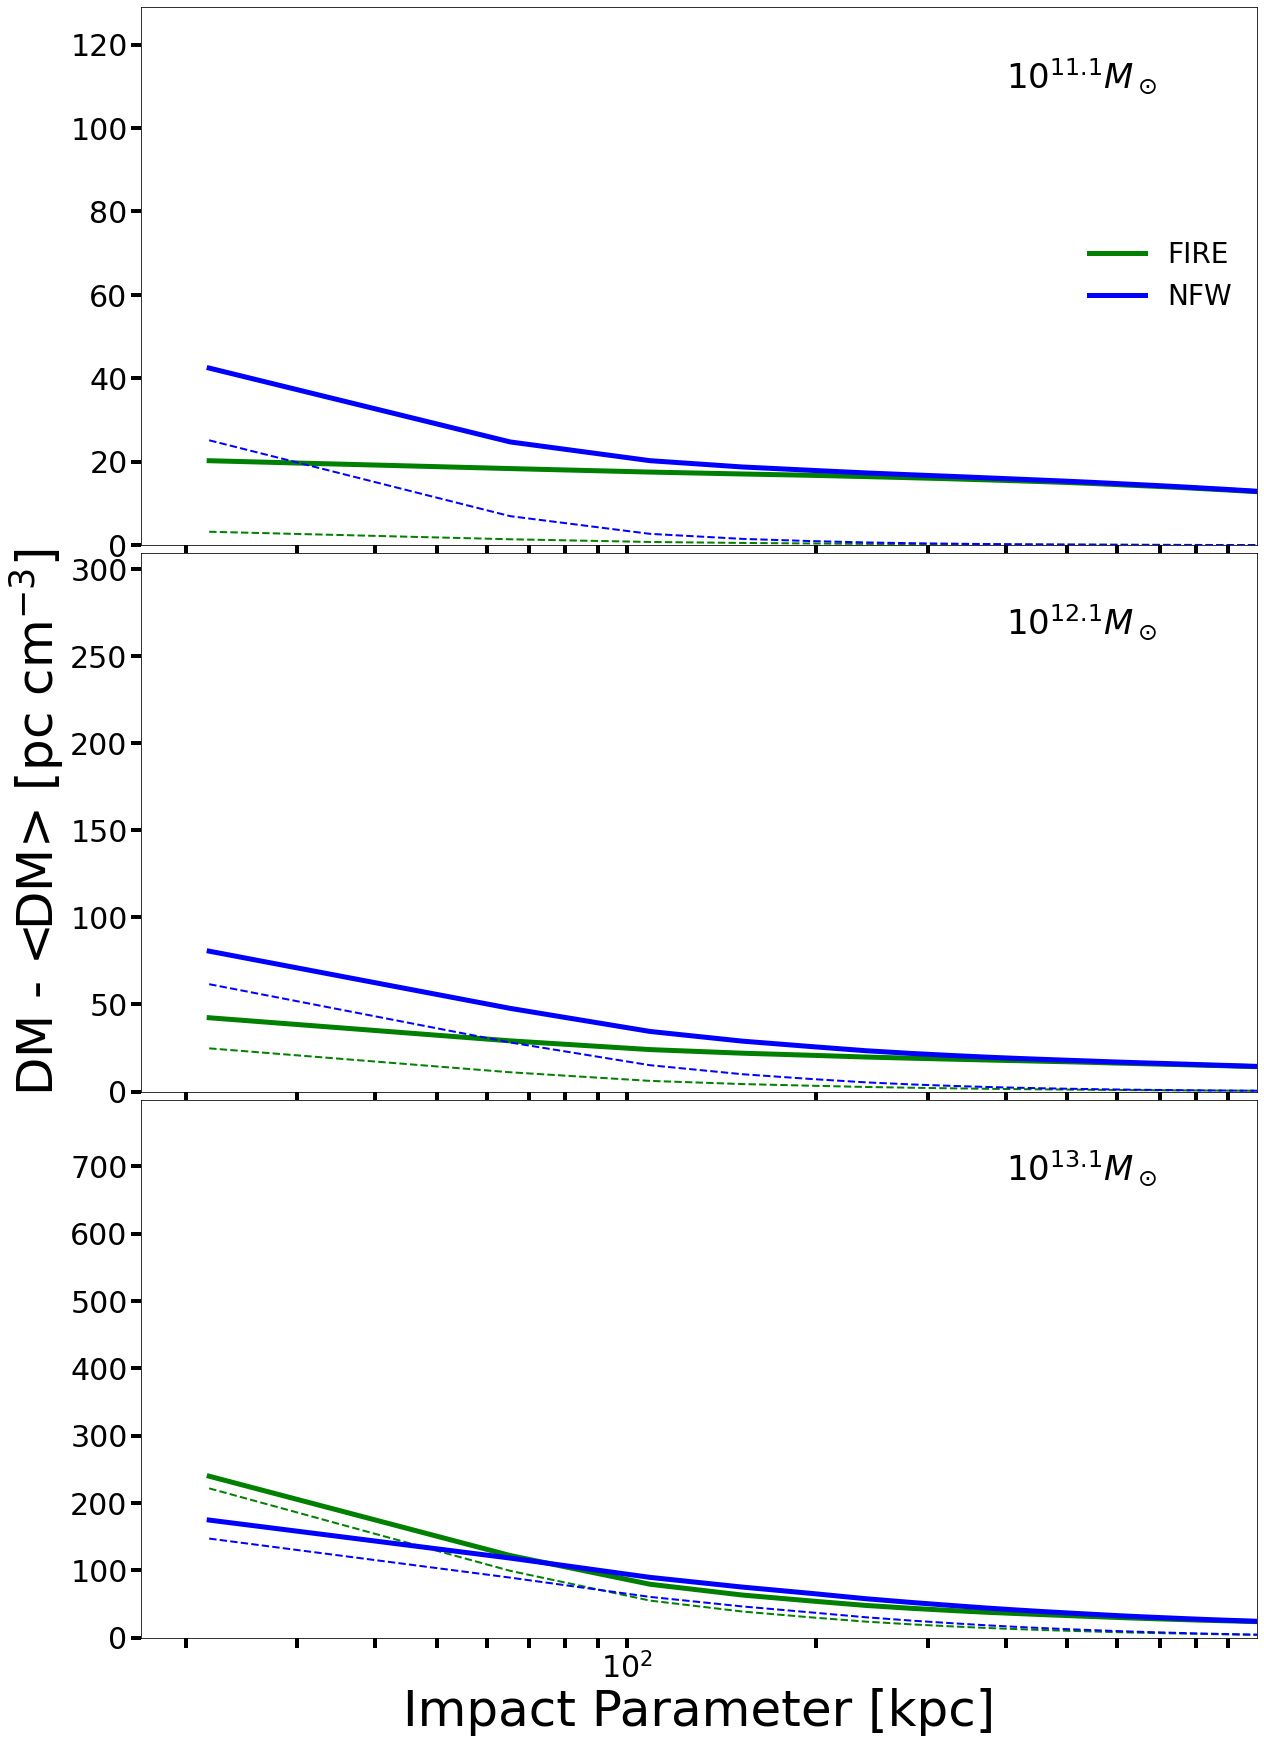

In [8]:

fp = FireProfile()
makefig.make_DM_vs_Rad_profiles_plots(series, False, 17, 999, resolution, grid_size, M_chosen,vir_rad_ar, provider, avg_mass_ar)
#makefig.make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 17, 999, resolution, grid_size, M_chosen, vir_rad_ar, provider, avg_mass_ar)

#print(resolution, grid_size, M_chosen,vir_rad_ar)
#for data in series:
#    print(data[1][M_chosen[1],:])
#make_DM_vs_Rad_profiles_plots(series, False, 15, 899)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 899)

#make_DM_vs_Rad_profiles_plots(series, False, 15, 799)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 799)